In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Define model

In [2]:
# Likelihood function of logistics regression
def likelihood(data, label, w):
    likelihood = -label * (np.dot(data, w)) + np.log(1 + np.exp(np.dot(data, w)))
    return np.sum(likelihood)

# Gradient of likelihood function
def gradient(data, label, w):
    gradient = np.zeros(w.shape[0])
    for x,y in zip(data,label):
        p1 = np.exp(np.dot(w, x)) / (1 + np.exp(np.dot(w, x)))    
        gradient += x * (y - p1)  
    return -gradient

# Hessian matrix of likelihood function
def hessian(data, label, w):
    hessian = np.zeros((w.shape[0], w.shape[0]))
    for x,y in zip(data,label):
        p1 = np.exp(np.dot(w, x)) / (1 + np.exp(np.dot(w, x)))
        hessian += np.reshape(x, (x.shape[0], 1)) * x * p1 * (1-p1)
    return hessian

# Solve logistics regression with newton's method
def logistic_regression(data, label, e, max_it=100):    
    # Expand data matrix
    data = np.c_[data, np.ones(data.shape[0])] 
    # Initialize coeffiencts of model y = 1 / (1 + e^(-wx))
    coef = np.zeros(data.shape[1]) 
    # Initialize step norm
    d_norm = np.inf 
    # Number of iteration
    it_count = 0 

    while d_norm > e and it_count < max_it:
        print("Step:", it_count, "Likelihood:", likelihood(data, label, coef))
        d = np.dot(np.linalg.inv(hessian(data, label, coef)), gradient(data, label, coef))
        # Update coefficient
        coef = coef - d 
        # Calculate step norm
        d_norm = np.linalg.norm(d) 
        it_count += 1
            
    return coef

# Predict novel data with trained coefficient
def predict(data, w):
    data = np.c_[data, np.ones(data.shape[0])]
    p0 = 1 / (1 + np.exp(np.dot(data, w)))
    p1 = 1 - p0
    res = np.c_[p0,p1]
    res = np.argmax(res, axis=1)
    return res

# Calculate the percision of predicted result
def score(predict, ground_truth):
    count = (predict == ground_truth).astype(int).sum()
    return (count/len(predict))

## Breast cancer data

In [3]:
data = np.genfromtxt("Breast_cancer_data/breast-cancer-wisconsin.data", delimiter=",")

# Remove nan data samples
data = data[~np.isnan(data).any(axis=1)][:,1:]
np.random.shuffle(data)

x = data[:,:-1]
label = data[:, -1]
unique, y = np.unique(label, return_inverse=True)

In [172]:
len(data)

683

In [173]:
x.shape

(683, 9)

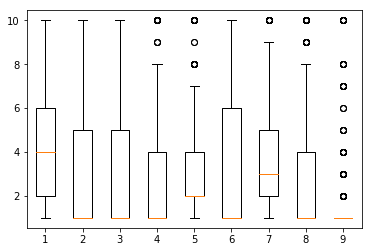

In [245]:
plt.boxplot(x)
plt.show()

<BarContainer object of 2 artists>

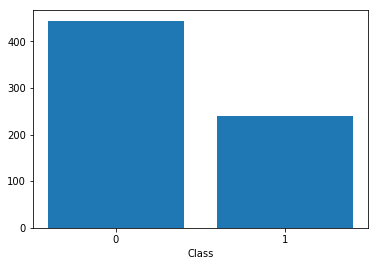

In [246]:
class_count = [len(y)-y.sum(), y.sum()]
plt.xticks([0,1])
plt.xlabel("Class")
plt.bar([0,1], class_count)

In [4]:
# Train test split
partition = 0.8
train_size = int(data.shape[0] * 0.8)

train_data = x[:train_size]
train_label = y[:train_size]

test_data = x[train_size:]
test_label = y[train_size:]

In [5]:
test_data.shape

(137, 9)

In [6]:
res = logistic_regression(train_data, train_label, 0.0000001)

Step: 0 Likelihood: 378.45836058573013
Step: 1 Likelihood: 111.84373037631394
Step: 2 Likelihood: 65.0320704447451
Step: 3 Likelihood: 48.783971231119054
Step: 4 Likelihood: 43.561419968484266
Step: 5 Likelihood: 42.497060437479675
Step: 6 Likelihood: 42.418568590770775
Step: 7 Likelihood: 42.41791903468648
Step: 8 Likelihood: 42.41791898522993


In [7]:
res

array([ 0.46861559,  0.0780386 ,  0.43459446,  0.26068064, -0.02471499,
        0.36044406,  0.25194459,  0.3431468 ,  0.54593917, -9.47564327])

In [8]:
pred = predict(test_data, res)
score(pred, test_label)

0.9635036496350365

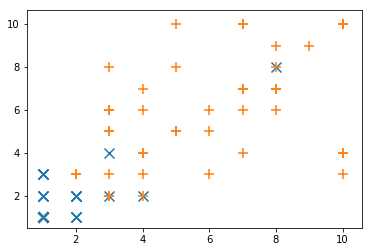

In [9]:
plt.scatter(test_data[test_label==0,1], test_data[test_label==0,2], marker='x', s=100)
plt.scatter(test_data[test_label==1,1], test_data[test_label==1,2], marker='+', s=100)

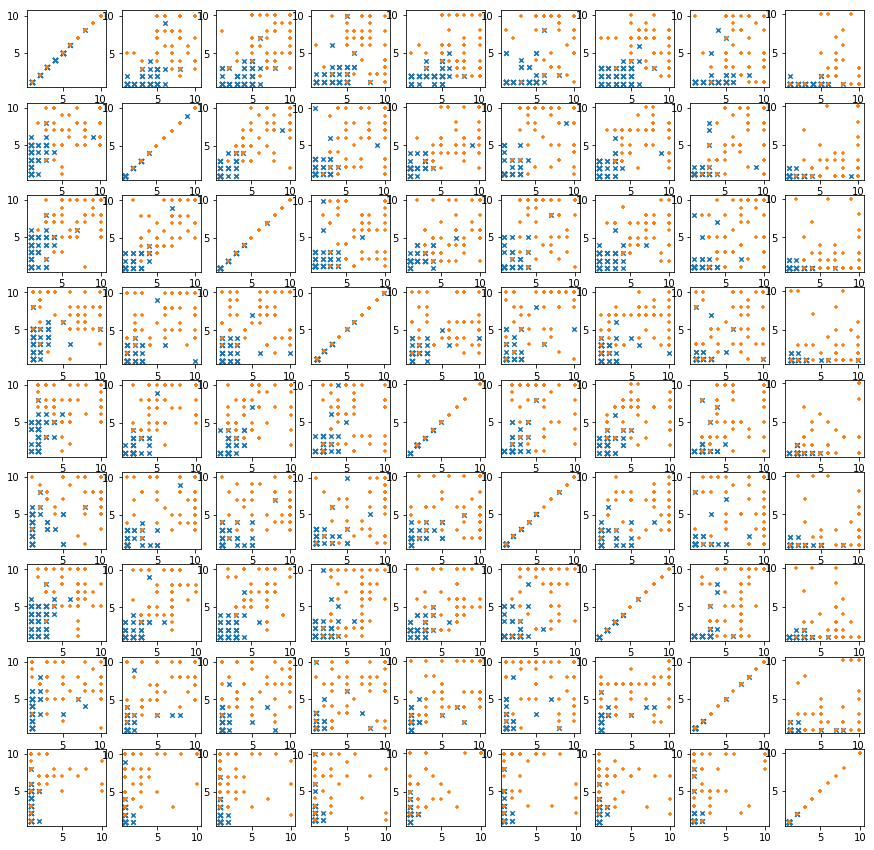

In [74]:
plt.figure(figsize=(15,15))
l = test_data.shape[1]
for i in range(l):
    for j in range(l):
        plt.subplot(l,l,i*l+j+1)
        plt.scatter(test_data[test_label==0,i], test_data[test_label==0,j], marker='x', s=20)
        plt.scatter(test_data[test_label==1,i], test_data[test_label==1,j], marker='+', s=20)
plt.show()

In [10]:
res = logistic_regression(train_data[:,:2], train_label, 0.0000001)
pred = predict(test_data[:,:2], res)
score(pred, test_label)

Step: 0 Likelihood: 378.45836058573013
Step: 1 Likelihood: 143.1953619601434
Step: 2 Likelihood: 98.48691844549026
Step: 3 Likelihood: 82.12810556362913
Step: 4 Likelihood: 77.8643947878222
Step: 5 Likelihood: 77.4193653508353
Step: 6 Likelihood: 77.41206999168996
Step: 7 Likelihood: 77.41206743868102
Step: 8 Likelihood: 77.41206743868068


0.948905109489051

In [11]:
res

array([ 0.62688093,  1.33842542, -7.62403866])

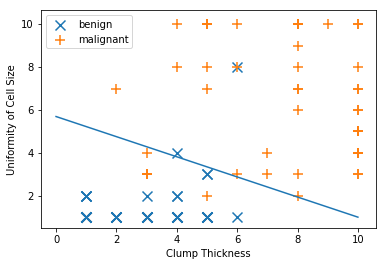

In [12]:
s1 = plt.scatter(test_data[test_label==0,0], test_data[test_label==0,1], marker='x', s=100)
s2 = plt.scatter(test_data[test_label==1,0], test_data[test_label==1,1], marker='+', s=100)
plt.legend(handles=[s1,s2], labels=["benign", "malignant"])

plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')

x = np.linspace(0, 10, 100)
y = (-res[0]*x - res[-1])/res[1]
plt.plot(x,y)
plt.show()

## Abalone data

In [299]:
data = np.genfromtxt("Abalone_data/abalone.data", delimiter=",", dtype=str)

# Remove third class
# np.random.shuffle(data)

x = data[:,1:-1].astype(float)
label = data[:, -1].astype(float)
y = (label > 10).astype(int)

<BarContainer object of 2 artists>

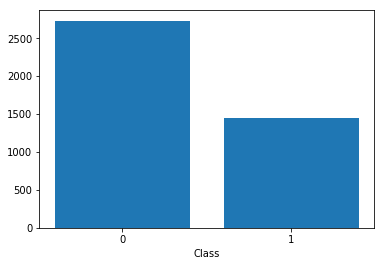

In [300]:
class_count = [len(y)-y.sum(), y.sum()]
plt.xticks([0,1])
plt.xlabel("Class")
plt.bar([0,1], class_count)

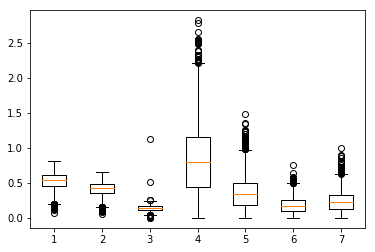

In [301]:
plt.boxplot(x)
plt.show()

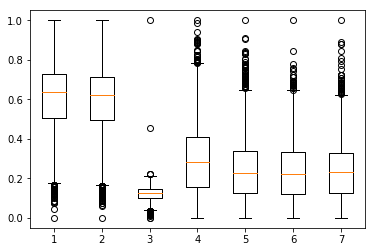

In [288]:
x = MinMaxScaler().fit_transform(x)
plt.boxplot(x)
plt.show()

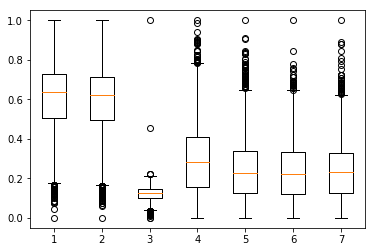

In [290]:
plt.boxplot(x)
plt.show()

In [302]:
# Train test split
partition = 0.8
train_size = int(x.shape[0] * 0.8)

train_data = x[:train_size]
train_label = y[:train_size]

test_data = x[train_size:]
test_label = y[train_size:]

In [303]:
x.shape

(4177, 7)

In [304]:
test_data.shape

(836, 7)

In [305]:
res = logistic_regression(train_data, train_label, 1e-5)

Step: 0 Likelihood: 2315.804730250777
Step: 1 Likelihood: 1592.190366736896
Step: 2 Likelihood: 1516.6412583067606
Step: 3 Likelihood: 1511.5468595692482
Step: 4 Likelihood: 1511.5102580716443
Step: 5 Likelihood: 1511.5102556799593


In [306]:
res

array([ -7.00759387,   9.64586225,   4.6627221 ,   8.75775144,
       -16.87014574,  -5.34399446,   7.63218962,  -3.70532621])

In [309]:
pred = predict(test_data, res)
score(pred, test_label)

0.7643540669856459

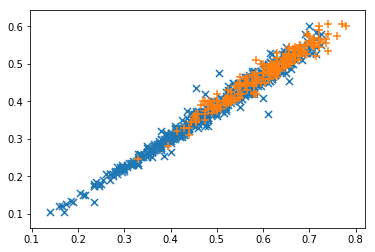

In [310]:
plt.scatter(test_data[test_label==0,0], test_data[test_label==0,1], marker='x', s=50)
plt.scatter(test_data[test_label==1,0], test_data[test_label==1,1], marker='+', s=50)
plt.show()

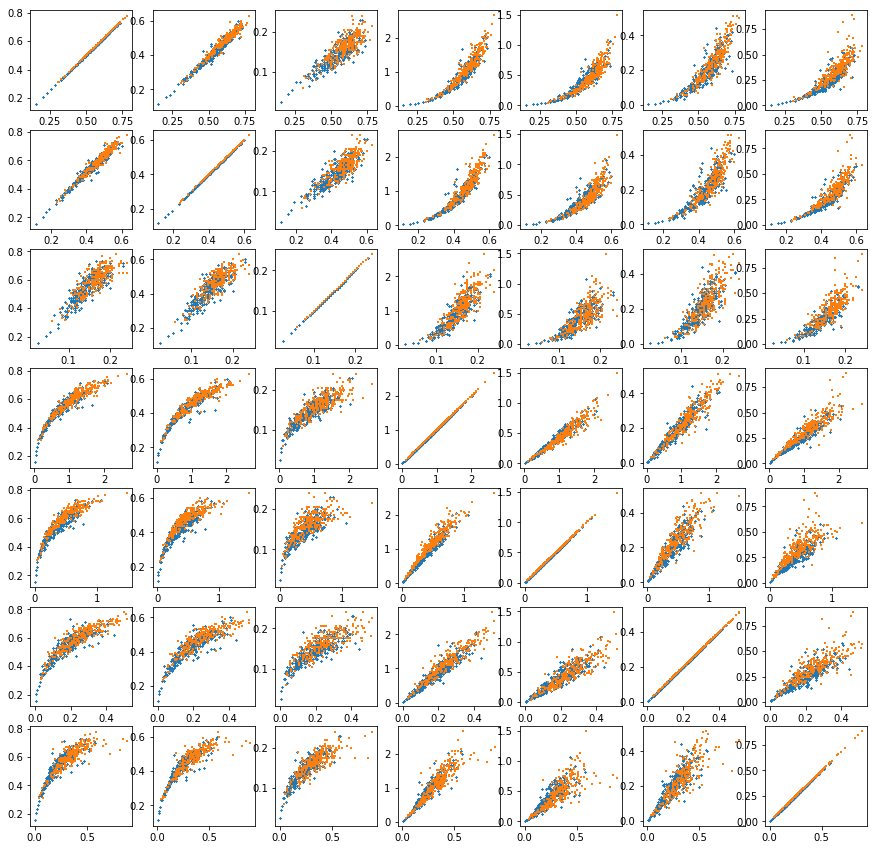

In [166]:
plt.figure(figsize=(15,15))
l = test_data.shape[1]
for i in range(l):
    for j in range(l):
        plt.subplot(l,l,i*l+j+1)
        plt.scatter(test_data[test_label==0,i], test_data[test_label==0,j], marker='x', s=2)
        plt.scatter(test_data[test_label==1,i], test_data[test_label==1,j], marker='+', s=2)
plt.show()

In [169]:
test_data.shape

(567, 7)

In [311]:
res = logistic_regression(train_data[:,[0,2]], train_label, 0.0000001)
pred = predict(test_data[:,[0,2]], res)
score(pred, test_label)

Step: 0 Likelihood: 2315.804730250777
Step: 1 Likelihood: 1831.7694521138428
Step: 2 Likelihood: 1782.6604994273089
Step: 3 Likelihood: 1781.0018236804353
Step: 4 Likelihood: 1780.998325999285
Step: 5 Likelihood: 1780.9983259805617


0.7200956937799043

In [312]:
pred = predict(test_data[:,[0,2]], res)
score(pred, test_label)

0.7200956937799043

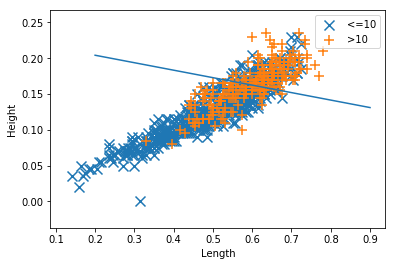

In [314]:
s1 = plt.scatter(test_data[test_label==0,0], test_data[test_label==0,2], marker='x', s=100)
s2 = plt.scatter(test_data[test_label==1,0], test_data[test_label==1,2], marker='+', s=100)
plt.legend(handles=[s1,s2], labels=["<=10", ">10"])

plt.xlabel('Length')
plt.ylabel('Height')

x = np.linspace(0.2, 0.9, 100)
y = (-res[0]*x - res[-1])/res[1]
plt.plot(x,y)
plt.show()

## Others

In [213]:
data = np.genfromtxt("transfusion.data", delimiter=",")

# Remove nan data samples
data = data[~np.isnan(data).any(axis=1)]
np.random.shuffle(data)

x = data[:,:-1]
label = data[:, -1]
unique, y = np.unique(label, return_inverse=True)

In [221]:
x[:5]

array([[0.02702703, 0.12244898, 0.12244898, 0.78125   ],
       [0.02702703, 0.08163265, 0.08163265, 0.25      ],
       [0.28378378, 0.        , 0.        , 0.19791667],
       [0.18918919, 0.12244898, 0.12244898, 0.72916667],
       [0.28378378, 0.04081633, 0.04081633, 0.375     ]])

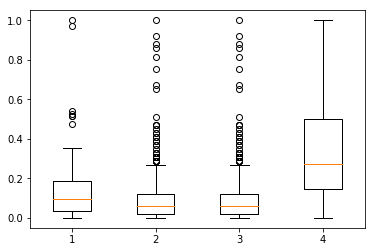

In [218]:
x = MinMaxScaler().fit_transform(x)
plt.boxplot(x)
plt.show()

In [219]:
# Train test split
partition = 0.8
train_size = int(data.shape[0] * 0.8)

train_data = x[:train_size]
train_label = y[:train_size]

test_data = x[train_size:]
test_label = y[train_size:]

In [223]:
res = logistic_regression(train_data, train_label, 1e-5)

Step: 0 Likelihood: 414.5020139748473
Step: 1 Likelihood: inf


In [ ]:
pred = predict(test_data, res)
score(pred, test_label)